In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import requests
import sys

/Users/hsorense/anaconda2/envs/pywtk/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
lambda_url = "https://h2oq9ul559.execute-api.us-west-2.amazonaws.com/dev"
start = pandas.Timestamp('2007-08-01', tz='utc')
end = pandas.Timestamp('2007-08-02', tz='utc')
attributes = ["power"]
params = {"site_id":"1337", "start":start.value//10**9, "end":end.value//10**9, "attributes":attributes}
resp = requests.get(lambda_url+"/met", params=params)
site_data = resp.json()


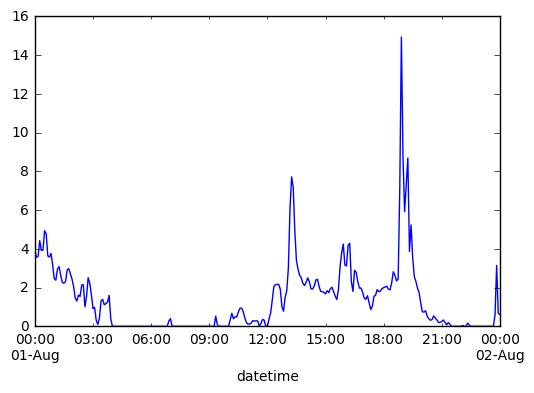

In [3]:
site_df = pandas.DataFrame(site_data['1337'])
site_df = site_df.set_index(pandas.DatetimeIndex(site_df["datetime"]*10**6))
site_df['power'].plot()

In [4]:

attributes = ['hour_ahead_power', 'hour_ahead_power_p10', 'hour_ahead_power_p90']
# Multiple attributes and site_ids are bugged at the moment
#params = {"site_id":["1337", "1338"], "start":start.value//10**9, "end":end.value//10**9, "attributes":attributes}
params = {"site_id":"1337", "start":start.value//10**9, "end":end.value//10**9}
resp = requests.get(lambda_url+"/fcst", params=params)
site_data = resp.json()


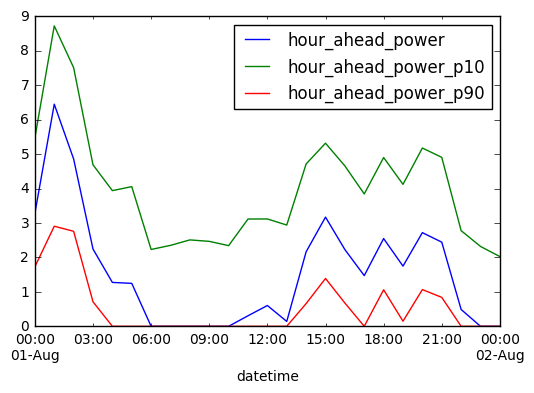

In [5]:
site_df = pandas.DataFrame(site_data['1337'])
site_df = site_df.set_index(pandas.DatetimeIndex(site_df["datetime"]*10**6))
site_df[attributes].plot()